## Stock Market Data Analysis (EDA_Python) 

## Introduction:
Stock Market Analysis and Prediction is the project related to Exploratory data analysis(EDA), Data visualization and Predictive analysis using data, provided by [The Investors Exchange (IEX)](https://iextrading.com/apps/stocks/). I looked at real-time financial data from the stock market. I have used python libraries to get stock information, visualize different aspects of it, and finally I worked at a few ways of analyzing the risk of a stock, based on its previous performance history. I have also used statistical method called **Monte Carlo Method** to predict future stock prices.

### Dataset description:
- **Date**: Date set by a company on which the investor must own shares.
- **Open**: Open refers the starting period (day) of trading.
- **High**: High refers highest price at which a stock is traded during a period.
- **Low**: Low refers the minimum price of a stock in a period.
- **Closed**: Closed refers the price of an individual stock when the stock exchange closed shop for the day.
- **Adj Close**: Adj Close refers Adjusted closing price.
- **Volume**: Volume refers an indicator of liquidity.

### We'll be answering the following questions by using Exploratory Data Analysis:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks 'closing prices'?
5. What was the correlation between different stocks 'daily returns'?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

### Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas and how to analyze basic attributes of a stock.

### Import Modules/ Libraries


**yfinance**: A library to download financial market data from Yahoo Finance.This can be used to download stock market data from India as well as other global market.

In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd                  # for Data Manupulation
import numpy as np                   # for numerical python
import matplotlib.pyplot as plt      #for data visualization
from pandas import Series,DataFrame
import seaborn as sns                #for data visualization
sns.set_style('whitegrid')
%matplotlib inline
import yfinance as yf

In [3]:
# to get rid of import error of pandas_datareader
import pandas_datareader as pdr        #for reading stock data from investor Exchange
from datetime import datetime          # for time stamp
#from __future__ import division         #for division

**pandas_datareader** 
- remote data access for pandas to extract data from various Internet sources into a pandas DataFrame

In [4]:
pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Load Dataset
- Download the Historical stock data for specific company listed in the Indian Stock Market using yfinance library.
- Here I extract reliance finace data from last 1 years.

Ex: 1. **IEX**
- The Investors Exchange (IEX) provides a wide range of data through an API.
- Historical stock prices are available for up to 15 years.

In [7]:
stock = 'RELIANCE.NS'

rel_data = yf.download(stock, start ='2022-02-01', end  = '2023-04-23')

[*********************100%***********************]  1 of 1 completed


In [8]:
rel_data.head()             # for top 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01 00:00:00+05:30,2408.0,2420.600098,2347.100098,2378.699951,2371.559814,6092033
2022-02-02 00:00:00+05:30,2407.0,2407.000000,2375.100098,2383.550049,2376.395264,4623163
2022-02-03 00:00:00+05:30,2392.0,2401.449951,2347.199951,2352.750000,2345.687744,4417864
2022-02-04 00:00:00+05:30,2341.0,2348.449951,2321.100098,2331.300049,2324.302246,5104761
2022-02-07 00:00:00+05:30,2342.0,2356.800049,2305.000000,2317.100098,2310.144775,4944725


In [9]:
rel_data.tail()             # for bottom 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-17 00:00:00+05:30,2424.949951,2424.949951,2349.050049,2367.449951,2367.449951,8274452
2023-04-18 00:00:00+05:30,2377.000000,2377.000000,2326.000000,2340.350098,2340.350098,4802172
2023-04-19 00:00:00+05:30,2339.050049,2357.899902,2332.199951,2352.000000,2352.000000,5664207
2023-04-20 00:00:00+05:30,2354.100098,2359.000000,2332.100098,2346.050049,2346.050049,3233882
2023-04-21 00:00:00+05:30,2350.649902,2361.000000,2336.399902,2349.000000,2349.000000,3529236


In [10]:
rel_data.shape            # for number of rows and columns

(302, 6)

- There are 302 rows & 6 columns are presents in this dataset.

In [11]:
rel_data.describe()   # To show statistics for numerical data       

,Open,High,Low,Close,Adj Close,Volume
count,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02
mean,2495.898007,2521.673665,2469.795544,2495.121033,2491.731248,6.507032e+06
std,133.827034,136.337609,132.962016,134.939187,134.020720,3.477034e+06
min,2211.500000,2220.000000,2180.000000,2201.250000,2201.250000,1.555270e+06
25%,2391.625000,2414.737488,2363.500000,2382.975037,2379.407837,4.421368e+06
50%,2499.099976,2532.750000,2470.050049,2501.400024,2496.832886,5.770856e+06
75%,2597.275024,2621.162476,2571.075073,2597.649902,2597.649902,7.841054e+06
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,3.784167e+07


In [12]:
rel_data.describe(include='all')            

,Open,High,Low,Close,Adj Close,Volume
count,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02
mean,2495.898007,2521.673665,2469.795544,2495.121033,2491.731248,6.507032e+06
std,133.827034,136.337609,132.962016,134.939187,134.020720,3.477034e+06
min,2211.500000,2220.000000,2180.000000,2201.250000,2201.250000,1.555270e+06
25%,2391.625000,2414.737488,2363.500000,2382.975037,2379.407837,4.421368e+06
50%,2499.099976,2532.750000,2470.050049,2501.400024,2496.832886,5.770856e+06
75%,2597.275024,2621.162476,2571.075073,2597.649902,2597.649902,7.841054e+06
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,3.784167e+07


In [13]:
rel_data.dtypes # To show datatypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [14]:
rel_data.info() # To show information about dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2022-02-01 00:00:00+05:30 to 2023-04-21 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       302 non-null    float64
 1   High       302 non-null    float64
 2   Low        302 non-null    float64
 3   Close      302 non-null    float64
 4   Adj Close  302 non-null    float64
 5   Volume     302 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.5 KB


#### Checking for null values

In [15]:
rel_data.isnull().sum()         # for no. of count of null values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* No null values are presents in this dataset.

#### Correlation between attributes & features in dataset

In [16]:
rel_data.corr()             # for corrlation between features

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.983649,0.983815,0.963592,0.963588,-0.081625
High,0.983649,1.000000,0.982422,0.987756,0.986754,-0.030462
Low,0.983815,0.982422,1.000000,0.984677,0.985171,-0.146124
Close,0.963592,0.987756,0.984677,1.000000,0.999627,-0.088621
Adj Close,0.963588,0.986754,0.985171,0.999627,1.000000,-0.095893
Volume,-0.081625,-0.030462,-0.146124,-0.088621,-0.095893,1.000000


In [17]:
rel_data['Returns'] = rel_data['Adj Close'].pct_change() # percentage changes  in previous records
rel_data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2022-02-01 00:00:00+05:30,2408.0,2420.600098,2347.100098,2378.699951,2371.559814,6092033,NaN
2022-02-02 00:00:00+05:30,2407.0,2407.000000,2375.100098,2383.550049,2376.395264,4623163,0.002039
2022-02-03 00:00:00+05:30,2392.0,2401.449951,2347.199951,2352.750000,2345.687744,4417864,-0.012922
2022-02-04 00:00:00+05:30,2341.0,2348.449951,2321.100098,2331.300049,2324.302246,5104761,-0.009117
2022-02-07 00:00:00+05:30,2342.0,2356.800049,2305.000000,2317.100098,2310.144775,4944725,-0.006091


#### Visualization
* line Plot for the closing price 

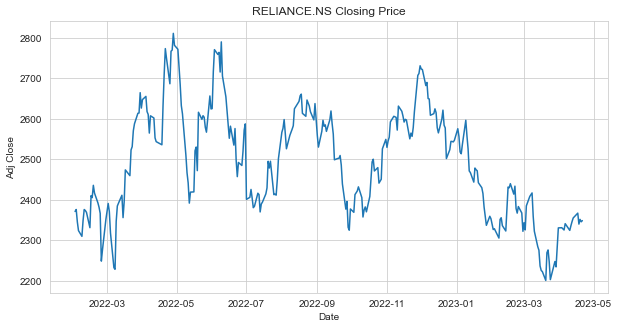

In [18]:
# plot lineplot
plt.figure(figsize = (10,5))
sns.lineplot(data = rel_data,x='Date',y='Adj Close')
plt.title(f'{stock} Closing Price')
plt.show()

- In march 2022 price is low & increase in may.

- In feb 2023 again droped.

#### Histogram for returns

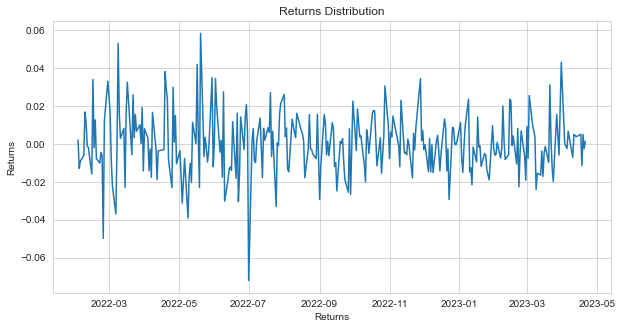

In [19]:
plt.figure(figsize = (10,5))
sns.lineplot(data = rel_data,x='Date',y='Returns')
plt.title('Returns Distribution')
plt.xlabel('Returns')
plt.show()

- Return so less , approximetly no returns & in July 2022 is in losses.

<AxesSubplot:xlabel='Date'>

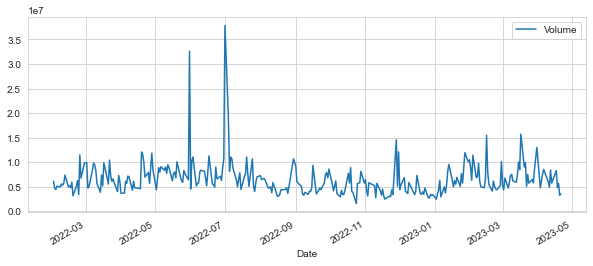

In [20]:
rel_data['Volume'].plot(legend=True,figsize=(10,4))

## For reading stock Market data from The Investors Exchange (IEX):
#### Ex. 2:

In [21]:
os.environ["IEX_API_KEY"] = "sk_5bdb6470e57d4819a152b9fc1c6508ff"

In [22]:
tech_stocks = ['AAPL','GOOG','MSFT','AMZN']

In [23]:
#setup end & start times for Data load
end = datetime.now()
end

datetime.datetime(2023, 4, 23, 11, 51, 43, 311468)

In [24]:
start = datetime(end.year - 1,end.month,end.day)
start

datetime.datetime(2022, 4, 23, 0, 0)

In [25]:
#ex. globals() variable
age = 23
globals()['age'] = 25
print('The age is:',age)

The age is: 25


In [26]:
# for loop for grabing iex finance data & seting as a dataframe
#set dataframe as the stock ticker

for stock in tech_stocks:
     globals()[stock] = pdr.DataReader(stock,'iex',start,end, api_key = os.getenv("IEX_API_KEV"))


RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=AAPL&types=chart&range=2y&token=sk_5bdb6470e57d4819a152b9fc1c6508ff

### 1. For Amazon:

In [27]:
AMZN.head()

NameError: name 'AMZN' is not defined

In [58]:
AMZN.shape

NameError: name 'AMZN' is not defined

In [59]:
AMZN.describe()

NameError: name 'AMZN' is not defined

### 2. For Apple:

In [60]:
AAPL.head()

NameError: name 'AAPL' is not defined

In [61]:
AAPL.describe()

NameError: name 'AAPL' is not defined

#### 3. For Microsoft

In [62]:
MSFT.head()

NameError: name 'MSFT' is not defined

In [63]:
MSFT.describe()

NameError: name 'MSFT' is not defined

#### 4.For google

In [64]:
GOOG.head()

NameError: name 'GOOG' is not defined

In [ ]:
GOOG.shape

In [ ]:
GOOG.describe()

In [ ]:
AAPL.columns

## Lets see a Historical view of the closing price:
### 1. What was the change in price of the stock over time?


In [ ]:
#closing price for apple
AAPL['close'].plot(legend = True,figsize = (12,6))

In [ ]:
#closing price for amazon
AMZN['close'].plot(legend = True,figsize = (12,6))

In [ ]:
#closing price for google
GOOG['close'].plot(legend = True,figsize = (12,6))

In [ ]:
#closing price for microsoft
MSFT['close'].plot(legend = True,figsize = (12,6))

- All stocks are down
- Amozon most fallen down

### Now lets plot the total volume of stock  being traded each day over the past 5 years:

In [ ]:
AAPL['volume'].plot(legend = True,figsize = (12,6))
plt.show()

In [ ]:
GOOG['volume'].plot(legend = True,figsize = (12,6))
plt.show()

In [ ]:
AMZN['volume'].plot(legend = True,figsize = (12,6))
plt.show()

In [ ]:
MSFT['volume'].plot(legend = True,figsize = (12,6))
plt.show()

### 3. What was the moving average of the various stocks?

### Now that we will seen the visualizations for the closing price and the volume traded each day,lets go and calculate the moving average for the stock.

#### "Moving Average=MA "
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the 'noice from random price fluctuations.Its a trend-following,or lagging,indicator because it is based on past price.'

#### Lets go ahead and plot out several moving average

In [ ]:
ma_day = [10,20,50]

In [ ]:
# For apple
for ma in ma_day:
    col_name = 'MA for %s days' %(str(ma))
    AAPL[col_name] = pd.DataFrame.rolling(AAPL['close'],ma).mean()

In [ ]:
AAPL.head(25)

In [ ]:
AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (12,6))
plt.show()

In [ ]:
AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = True,figsize = (12,6))

In [ ]:
# For google
for ma in ma_day:
    col_name = 'MA for %s days' %(str(ma))
    GOOG[col_name] = pd.DataFrame.rolling(GOOG['close'],ma).mean()
GOOG.head(15)

In [ ]:
GOOG[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (12,6))
plt.show()

In [ ]:
# For Microsoft
for ma in ma_day:
    col_name = 'MA for %s days' %(str(ma))
    MSFT[col_name] = pd.DataFrame.rolling(MSFT['close'],ma).mean()

MSFT.head(10)

In [ ]:
MSFT[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (12,6))
plt.show()

In [ ]:
# For amazon
for ma in ma_day:
    col_name = 'MA for %s days' %(str(ma))
    AMZN[col_name] = pd.DataFrame.rolling(AMZN['close'],ma).mean()
    
AMZN.head(10)

In [ ]:
AMZN[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (12,6))
plt.show()

### Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [ ]:
AAPL.head()

In [ ]:
AAPL['Daily Return'] = AAPL['close'].pct_change()
AAPL.head(15)

In [ ]:
AAPL['Daily Return'].plot(figsize = (12,6),legend = True,linestyle = '--',marker = 'o')

**Obeservation**:

### Now lets get an overall look at the average daily returns using a histogram. We will use seabron to create both a hostogram and kde plot on the same figure.

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100,color ='blue')
plt.show()

- its a normal distribution no returns

### Now want to analyze the returns of all the stocks in our list. Lets go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.

In [ ]:
closing_df1 = pd.DataFrame(AAPL['close'])
close1  = closing_df1.rename(columns = {"close":"AAPL_close"})

closing_df2 = pd.DataFrame(AAPL['close'])
close2  = closing_df2.rename(columns= {"close":"GOOG_close"})

closing_df3 = pd.DataFrame(AAPL['close'])
close3  = closing_df3.rename(columns= {"close":"MSFT_close"})

closing_df4 = pd.DataFrame(AAPL['close'])
close4  = closing_df4.rename(columns= {"close":"AMZN_close"})

closing_df = pd.concat([close1,close2,close3,close4],axis = 1)

In [ ]:
closing_df.head()

### Now That we have all the closing price, lets go ahead and get the daily return for all the stocks. 

In [ ]:
# make a new tech return Dataframe
tech_returns = closing_df.pct_change()
tech_returns.head()

### Now we compare the daily percentage return of two stocks to check how correlated. First lets see a stock compared to itsrlf.

In [ ]:
#Compairring google to itself should show a perfecttly linear relationship.
sns.jointplot('GOOG_close','GOOG_close',tech_returns,kind = 'scatter', color = 'seagreen')

### So now we can see that if two stocks are perfectly (and posively)correlated with each other a linear relationship between its daily return values should occur. so lets go ahead and compare Google and Microsoft the same way.

In [ ]:
sns.jointplot('GOOG_close','MSFT_close',tech_returns,kind ='scatter',color='seagreen')
plt.show()

- Python's Seaborn and pandas packages make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot.

In [ ]:
sns.pairplot(tech_returns.dropna())
plt.show()

*  all are positively correlated

- Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

In [ ]:
corr = tech_returns.dropna().corr()

sns.heatmap(corr,annot = True)
plt.show()

This means for every initial stock you purchase, you are puttong about $37.38 at risk% of the time from our Monte Cartlo Simulation.